Dataset: Allegheny County 911 Dispatches - EMS and Fire

Our group based our metric on health and safety within different neighborhoods in Allegheny County. My submetric is number of fire dispatches per neighborhood. This is essential for choosing the best neighborhood because a higher number of fire dispatches could suggest the neighborhood has poor infrastructure, lack of fire prevention, and noisy due to the sounds of frequent emergencies. As a result, a neighborhood with a low number of fire dispatches would indicate it's safer when considering fire safety.

I will analyze fire 911 dispatches records to identify which Pittsburgh neighborhood encounters the lowest number of fire dispatches.

Team Member: Kara Partridge

Link: https://data.wprdc.org/dataset/allegheny-county-911-dispatches-ems-and-fire 

In [33]:
#import pandas
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
#import and read dataset
url = "https://tools.wprdc.org/downstream/b6340d98-69a0-4965-a9b4-3480cea1182b"
fire = pd.read_csv(url)
fire.head()

,_id,call_id_hash,service,priority,priority_desc,call_quarter,call_year,description_short,city_code,city_name,geoid,census_block_group_center__x,census_block_group_center__y
0,1,000015F42010D7E9BFD0478A34A274,Fire,F1,Potential to become a threat to life safety.,Q4,2019,NATURAL GAS ISSUE,WBG,WILKINSBURG,4.200356e+11,-79.873544,40.443072
1,2,00021C3CC2642C0843EECEEDDCEBDA,Fire,Q1,EMS ALS life threatening response,Q2,2018,EMS CALL/ASSIST,PGH,PITTSBURGH,4.200327e+11,-80.028515,40.465407
2,3,000388BD0E2E1C493226DEB18A44E9,Fire,Q0,EMS ALS life threatening response w/ backup,Q3,2019,EMS CALL/ASSIST,PGH,PITTSBURGH,4.200308e+11,-79.935108,40.459304
3,4,000460CED4F90098D1E6788565AA35,Fire,Q1,EMS ALS life threatening response,Q3,2017,EMS CALL/ASSIST,PGH,PITTSBURGH,4.200302e+11,-79.981436,40.454281
4,5,00055108E15C5F3527D6606B1F06AD,Fire,F2,Incidents actively occurring or that has just ...,Q1,2016,WIRES FIRE/ARCING/UNK DANGER,BWB,BALDWIN BORO,4.200348e+11,-79.964467,40.393212


To analyze this data, I will remove any unwanted columns from the dataset so that it's simplified when I want to analyze it. I will keep the city name and priority, which is where out main focus is.

In [10]:
#remove the unwanted columns
fire_col=fire.drop(columns=['_id', 'call_id_hash', 'service', 'priority_desc', 'call_quarter', 'call_year', 'description_short', 'city_code', 'geoid', 'census_block_group_center__x', 'census_block_group_center__y'])
fire_col.head()

,priority,city_name
0,F1,WILKINSBURG
1,Q1,PITTSBURGH
2,Q0,PITTSBURGH
3,Q1,PITTSBURGH
4,F2,BALDWIN BORO


Since the unwanted columns are now removed, I can analyze this data much easier. I want to include the counts of each priority level within each city, so I will do this using a stacked bar chart; however, there are too many neighborhoods to analyze in one chart. Therefore, I will make 2 that include the neighborhoods with the 10 least total dispatch calls and the 10 most total dispatch calls.

In [35]:
#group by neighborhood and priority
fire_grouped=fire_col.groupby(['city_name', 'priority']).size().unstack(fill_value=0)
fire_grouped.head()

priority,1A,1C,2A,2C,3A,3C,4A,4C,5A,6A,...,HM,HR,P1,P2,P3,Q0,Q1,Q2,Q3,Q4
city_name,,,,,,,,,,,,,,,,,,,,,
ALEPPO,18,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,2,6,1,0,2
ARMSTRONG COUNTY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ASPINWALL,39,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,108,21,7,5,9
AVALON,191,0,5,0,1,0,1,0,0,0,...,0,0,0,0,0,469,47,29,13,8
BALDWIN BORO,370,0,17,0,1,0,0,0,0,0,...,0,0,0,0,1,14,4,5,2,2


In [36]:
#find the total dispatches per neighborhood
fire_grouped['total_dispatches']=fire_grouped.sum(axis=1)
fire_grouped.head()

priority,1A,1C,2A,2C,3A,3C,4A,4C,5A,6A,...,HR,P1,P2,P3,Q0,Q1,Q2,Q3,Q4,total_dispatches
city_name,,,,,,,,,,,,,,,,,,,,,
ALEPPO,18,0,2,0,0,0,0,0,0,0,...,0,0,0,0,2,6,1,0,2,476
ARMSTRONG COUNTY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
ASPINWALL,39,0,1,0,0,0,0,0,0,0,...,0,0,0,1,108,21,7,5,9,1157
AVALON,191,0,5,0,1,0,1,0,0,0,...,0,0,0,0,469,47,29,13,8,2079
BALDWIN BORO,370,0,17,0,1,0,0,0,0,0,...,0,0,0,1,14,4,5,2,2,4693


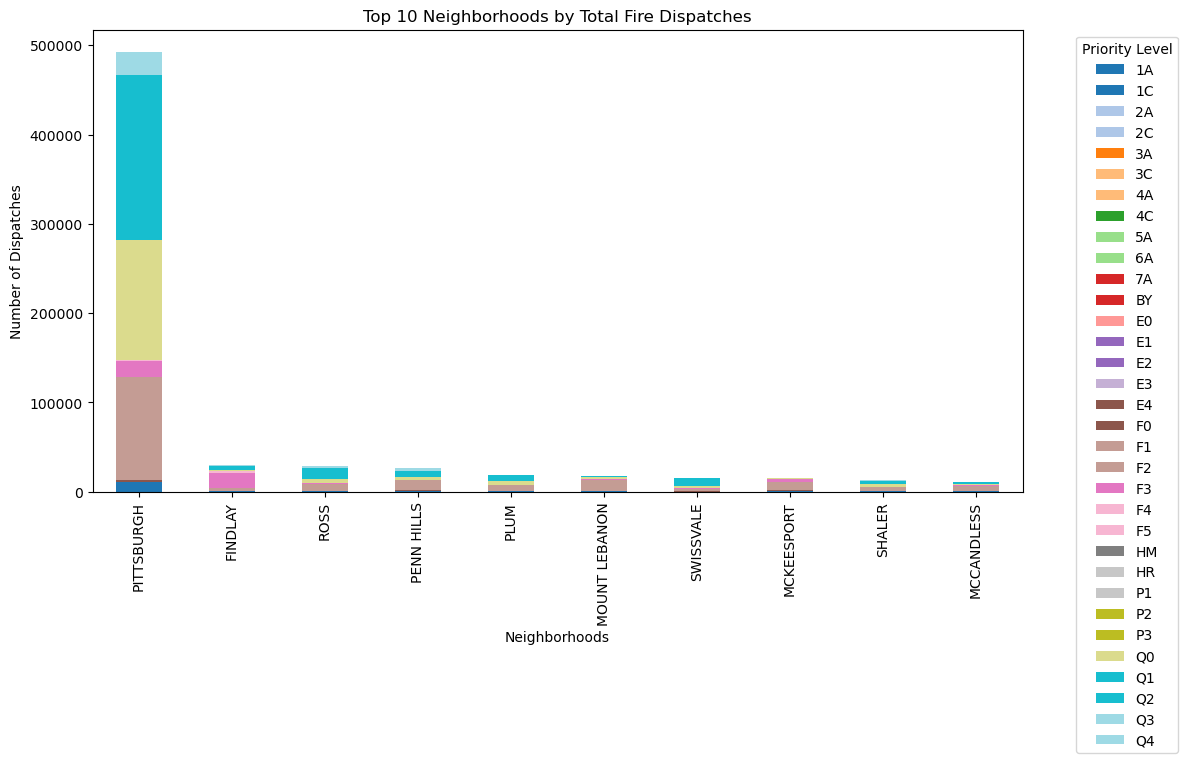

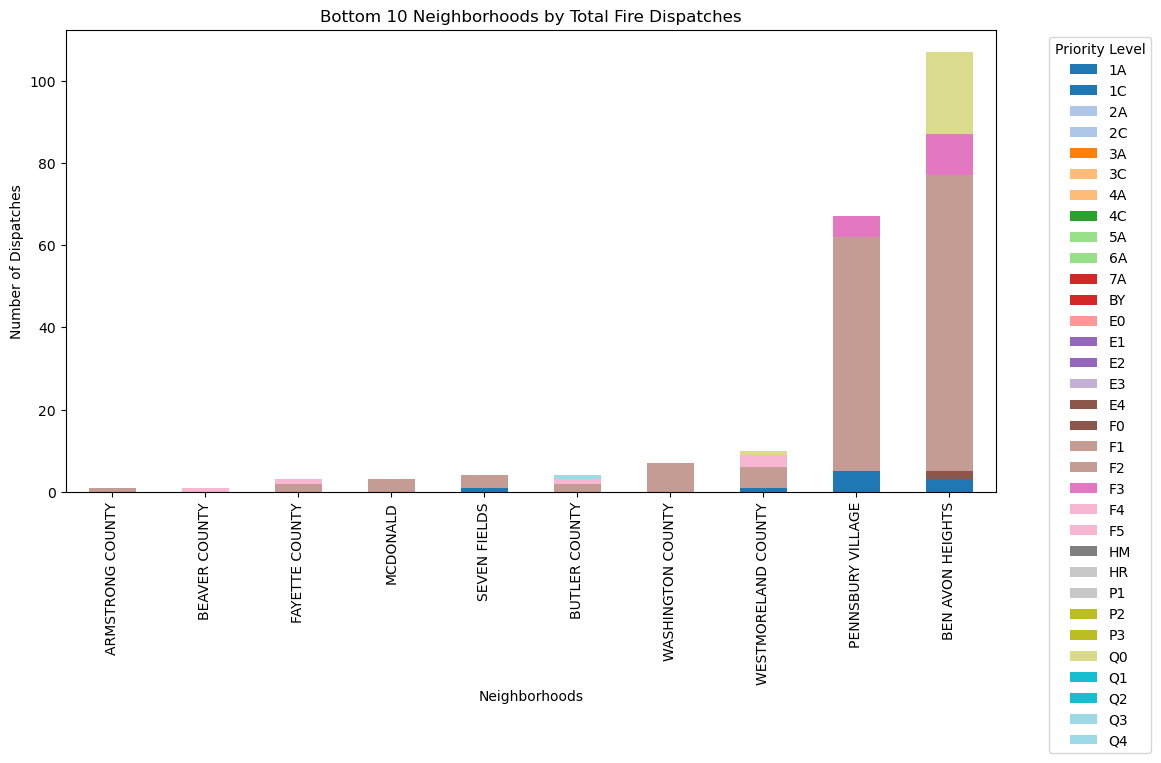

In [27]:
#find the top and bottom 10 neighborhoods for total dispatches
fire_top=fire_grouped.sort_values('total_dispatches', ascending=False).head(10)
fire_bottom=fire_grouped.sort_values('total_dispatches', ascending=True).head(10)

#remove total dispatches column
top_10_plot=fire_top.drop(columns='total_dispatches')
bottom_10_plot=fire_bottom.drop(columns='total_dispatches')

#plot the top 10 neighborhoods
top_10_plot.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
plt.title('Top 10 Neighborhoods by Total Fire Dispatches')
plt.xlabel('Neighborhoods')
plt.ylabel('Number of Dispatches')
plt.legend(title='Priority Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#plot the bottom 10 neighborhoods
bottom_10_plot.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
plt.title('Bottom 10 Neighborhoods by Total Fire Dispatches')
plt.xlabel('Neighborhoods')
plt.ylabel('Number of Dispatches')
plt.legend(title='Priority Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

As pictured, these are the 10 neighborhoods for the highest and lowest number of fire dispatches. This helps us decide on which neighborhoods are generally safer based off of fire dispatches in each neighborhood.

Not only do the number of dispatches matter, but the priotity level does as well. I will now analyze the 10 neighborhoods with the most and least number of high priority dispatches. The priority codes are listed on the side of the segnmented bar graph above, but I will focus on the ones with the highest priority. Based off the [priority code description dataset](https://data.wprdc.org/dataset/allegheny-county-911-dispatches-ems-and-fire/resource/7a9b3eea-3b3a-4dc4-aae0-02b864fa6f41), these are the codes with the highest priority:

5A, 6A, 7A, E0, E1, F0, F1, F2, Q0, Q1

Disclaimer: I based these off personal opinion, as there is no other way to categorize the priorities of this certain dataset.

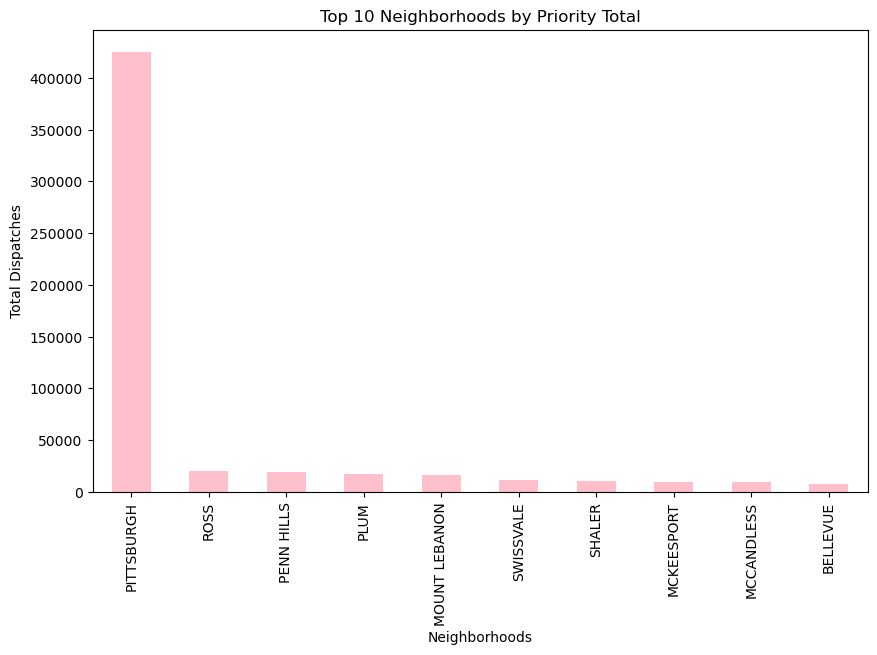

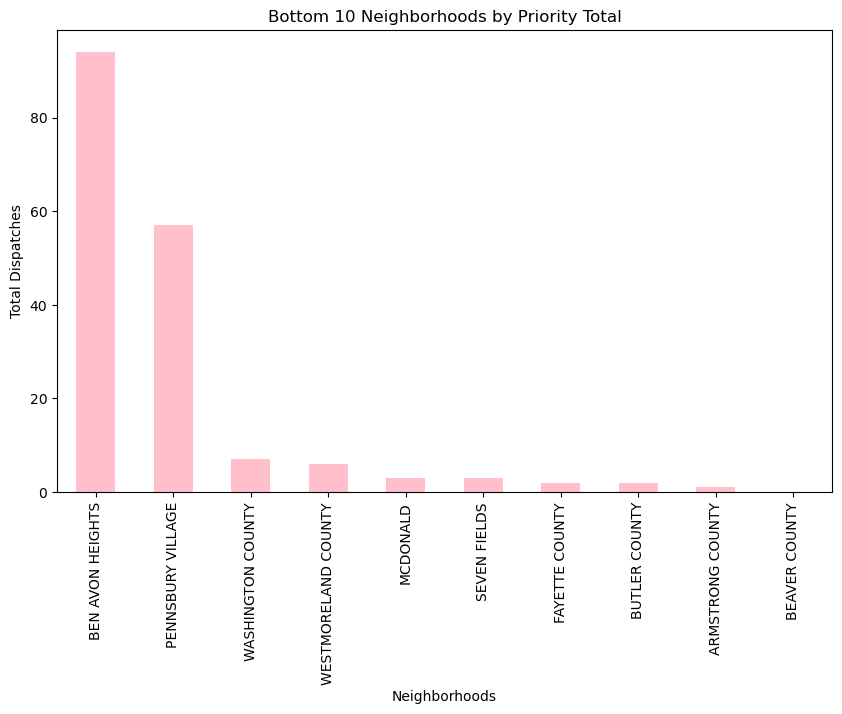

In [32]:
#these are the highest priorities that we want to analyze
highest_priority=["5A", "6A", "7A", "E0", "E1", "F0", "F1", "F2", "Q0", "Q1"]

#calculate the total for the new set of priorities
fire_grouped['priority_total']=fire_grouped[highest_priority].sum(axis=1)

#sort by the total
sorted_neigh=fire_grouped.sort_values('priority_total', ascending=False)

#find the top and bottom 10
new_top_10=sorted_neigh.head(10)
new_bottom_10=sorted_neigh.tail(10)

#plot the top 10 neighborhoods
new_top_10['priority_total'].plot(kind='bar', figsize=(10,6), color='pink')
plt.title('Top 10 Neighborhoods by Priority Total')
plt.xlabel('Neighborhoods')
plt.ylabel('Total Dispatches')
plt.show()

#plot the bottom 10 neighborhoods
new_bottom_10['priority_total'].plot(kind='bar', figsize=(10,6), color='pink')
plt.title('Bottom 10 Neighborhoods by Priority Total')
plt.xlabel('Neighborhoods')
plt.ylabel('Total Dispatches')
plt.show()

Analyzing this data based off both set of graphs helps us find which neighborhood is truly the safest. This will allow us enough wiggle room incase another group member's dataset indicates that the safest city on their assesment isn't quite the safest on mine.